In [225]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yaml
import tensorflow as tf
import random
import matplotlib
import os
from os import listdir
from os.path import isfile, join

In [145]:
TRAIN_DIR = 'Emotions/train'
TEST_DIR = "Emotions/test"
batch_size = 64
img_height, img_width = 224, 224

In [174]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    validation_split=0.2,
    labels='inferred',
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size, shuffle=True)

val_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    validation_split=0.2,
    labels='inferred',
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size, shuffle=True)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.
Found 7178 files belonging to 7 classes.
Using 1435 files for validation.


In [178]:
#Number of emotions
class_names = train_ds.class_names
num_classes = len(class_names)
class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [187]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
i = tf.keras.layers.Input(shape=[img_width, img_height, 3], dtype=tf.uint8)
x = tf.cast(i, tf.float32)

pretrained = tf.keras.applications.resnet50.ResNet50(input_shape=(img_width, img_height, 3), include_top=False,
                                                     weights="imagenet",
                                                     classes=num_classes, classifier_activation="softmax")
model = tf.keras.models.Sequential([
    pretrained,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_11  (None, 2048)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_69 (Dense)            (None, 256)               524544    
                                                                 
 dense_70 (Dense)            (None, 64)                16448     
                                                                 
 dense_71 (Dense)            (None, 7)                 455       
                                                                 
Total params: 24,129,159
Trainable params: 24,076,039
Non-trainable params: 53,120
____________________________________

In [189]:
callbacks = tf.keras.callbacks.ModelCheckpoint("emotion.h5", save_best_only=True)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=callbacks)

Epoch 1/20


2023-02-09 03:48:34.884310: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


359/359 [==============================] - ETA: 0s - loss: 1.3052 - accuracy: 0.5041

2023-02-09 03:52:10.083055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


359/359 [==============================] - 224s 598ms/step - loss: 1.3052 - accuracy: 0.5041 - val_loss: 1.6716 - val_accuracy: 0.3512
Epoch 2/20
359/359 [==============================] - 223s 620ms/step - loss: 1.0932 - accuracy: 0.5859 - val_loss: 1.5224 - val_accuracy: 0.4167
Epoch 3/20
359/359 [==============================] - 227s 629ms/step - loss: 0.9745 - accuracy: 0.6356 - val_loss: 1.7653 - val_accuracy: 0.3498
Epoch 4/20
359/359 [==============================] - 228s 633ms/step - loss: 0.8678 - accuracy: 0.6726 - val_loss: 1.4022 - val_accuracy: 0.5296
Epoch 5/20
359/359 [==============================] - 227s 630ms/step - loss: 0.7671 - accuracy: 0.7141 - val_loss: 1.4871 - val_accuracy: 0.5226
Epoch 6/20
359/359 [==============================] - 223s 617ms/step - loss: 0.6571 - accuracy: 0.7593 - val_loss: 1.6822 - val_accuracy: 0.4634
Epoch 7/20
359/359 [==============================] - 220s 611ms/step - loss: 0.5352 - accuracy: 0.8065 - val_loss: 1.6674 - val_accura

In [190]:
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,1.305162,0.504136,1.671572,0.351220
1,1.093171,0.585902,1.522427,0.416725
2,0.974486,0.635624,1.765332,0.349826
3,0.867841,0.672588,1.402158,0.529617
4,0.767117,0.714124,1.487130,0.522648
5,0.657107,0.759274,1.682172,0.463415
6,0.535215,0.806470,1.667420,0.484321
7,0.443541,0.839472,1.565200,0.520558
8,0.339192,0.877699,2.150149,0.466899
9,0.264957,0.904824,2.339977,0.444599


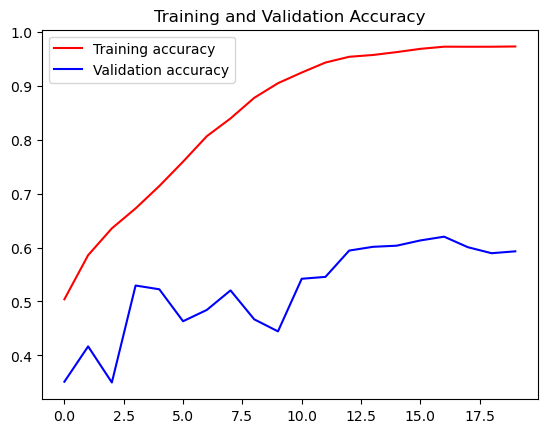

<Figure size 640x480 with 0 Axes>

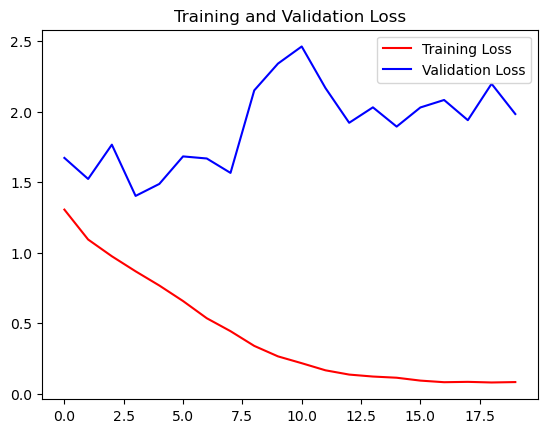

<Figure size 640x480 with 0 Axes>

In [196]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

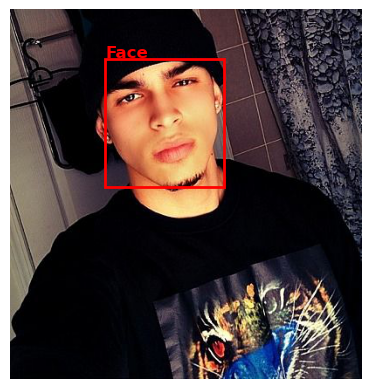

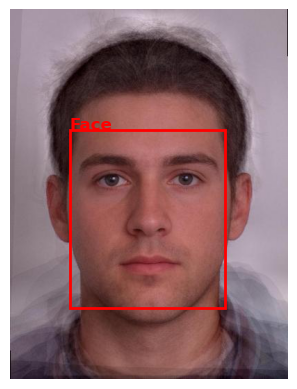

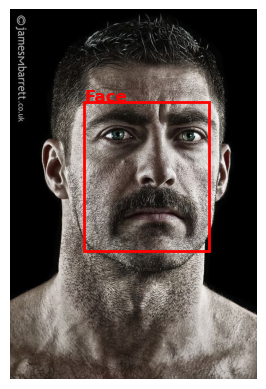

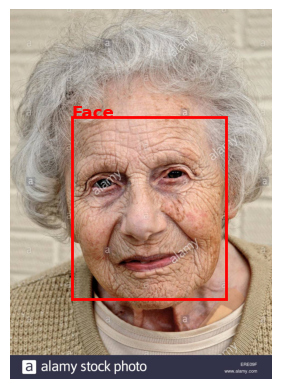

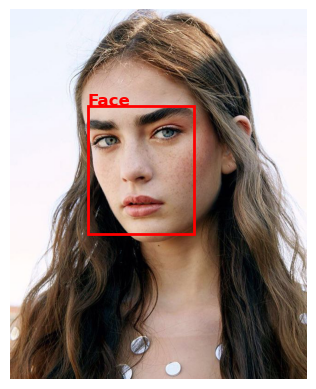

In [244]:
#YOLOv8 start!

images_path = "Human Faces/Images"
annotations_path = "Human Faces/Labels"


def print_random_images(photos: list, n: int = 5) -> None:
    if n > 10:
        n = 10
    for im in range(n):
        random_photo = random.choice(photos)
        random_photo_path = str(images_path) + '/' + str(random_photo)

        with Image.open(random_photo_path) as fd:
            fig, ax = plt.subplots()
            ax.imshow(fd)
            ax.axis(False)
            image_width, image_height = fd.size

        file = random_photo[:random_photo.index(".")] + '.txt'
        annotation_file = annotations_path + "/" + file
        with open(annotation_file) as f:
            label = f.read()

        labels = label.split(" ")
        labels[4] = labels[4][:-1]
        labels = list(map(float, labels))

        x1, y1, width, height = labels[1:]
        bbox_x = x1 * image_width - image_width * width / 2
        bbox_y = y1 * image_height - image_height * height / 2
        bbox_width = width * image_width
        bbox_height = height * image_height

        mpatch = matplotlib.patches.Rectangle((bbox_x, bbox_y), bbox_width, bbox_height, linewidth=1, edgecolor='r',
                                              facecolor="none", lw=2)
        ax.add_patch(mpatch)
        rx, ry = mpatch.get_xy()
        ax.annotate('Face', (rx, ry - 2), color='red', weight='bold', fontsize=12, ha='left', va='baseline')


photos_list = [f for f in listdir(images_path) if isfile(join(images_path, f))]
print_random_images(photos_list)

In [246]:
import splitfolders
input_folder = "Human Faces/"
output_folder = "Human Faces/Training"
splitfolders.ratio(input_folder, output = output_folder, seed = 1337, ratio=(0.8,0.2), group_prefix=None, move=False)

Copying files: 1582 files [00:01, 898.14 files/s] 
Copying files: 1582 files [00:00, 3820.53 files/s]
